In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
from scipy import ndimage as ndi
import math
from skimage import io, filters, morphology, measure, color
import skimage
import pandas as pd
import glob
import natsort

## Time
0.4 seconds per frame

In [6]:
imagename = "./Dynamic_resclice_Movie1_ROI1_Tris-acetate Phase Separation Buffer_10min_0.4sec_ROI_d4_8bit.tif"

In [7]:
length_line = 18.717

In [8]:
data = io.imread(imagename)
print("shape: {}".format(data.shape))
print("dtype: {}".format(data.dtype))
print("range: ({}, {})".format(data.min(), data.max()))

shape: (58, 310)
dtype: uint8
range: (41, 160)


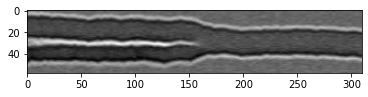

In [9]:
plt.imshow(data,cmap="gray")

In [10]:
tresh = filters.threshold_li(data)
binary = data < tresh

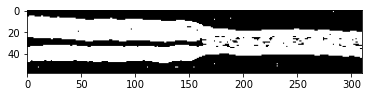

In [11]:
plt.imshow(binary,cmap="gray")

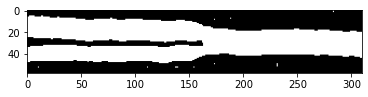

In [12]:
plt.imshow(morphology.closing(binary, morphology.square(3)),cmap="gray")

In [13]:
closed_binary = morphology.closing(binary, morphology.square(3))
labels = skimage.measure.label(closed_binary)

range: (0, 10)


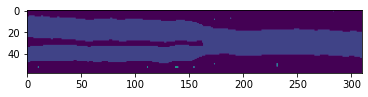

In [14]:
plt.imshow(labels)
print("range: ({}, {})".format(labels.min(), labels.max()))

In [15]:
seq = [region.area for region in measure.regionprops(labels)]
max_index = seq.index(max(seq))

range: (0, 10)


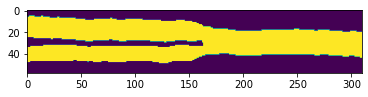

In [16]:
plt.imshow(labels==max_index+1)
print("range: ({}, {})".format(labels.min(), labels.max()))
my_label = labels==max_index+1

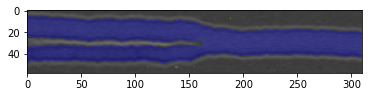

In [17]:
image_label_overlay = color.label2rgb(labels, image=data, bg_label=0)
plt.imshow(image_label_overlay)

In [18]:
length_list=[]
for column in my_label.T:
    top_pixel = None
    bottom_pixel = None
    for index, pixel in enumerate(column):
        if pixel == True:
            top_pixel = index
            break
    for index, pixel in enumerate(reversed(column)):
        if pixel == True:
            bottom_pixel = index
            break
    start = top_pixel
    stop = len(column) - bottom_pixel
    length = stop - start
    length_list.append(length)


In [32]:
# x axis in seconds
duration_of_frame = 0.4
x = [frame * duration_of_frame for frame in range(0,len(length_list))]
y_in_pixels = length_list
line_length = 18.717
# y axis in microns
y = [length * (line_length / data.shape[0]) for length in length_list]

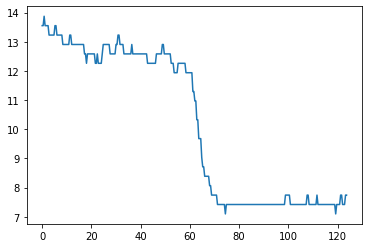

In [33]:
length = 18.717
plt.plot(x,y)